# Exploratory Data Analysis

### Find relationships in the data between the columns

Firsly let's have a look at the dependency between qualifying and race finishing positions. You can imagine that the higher you qualify the higher the chance of finishing top.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

It appears there is a starting grid position 0. This seems to indicate pit-lane start or a DNQ (so no race participation), not an ordinary grid start.

In [23]:
results = pd.read_csv('f1_dataset/results_fixed.csv')
zero_grid = results.loc[results['grid'] == 0]
zero_grid.head(5)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
2281,2281,2282,127,62,18,22,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77
2432,2432,2433,134,49,21,20,0,-1,F,20,0.0,0,\N,\N,\N,\N,\N,\N,81
2433,2433,2434,134,59,21,21,0,-1,F,21,0.0,0,\N,\N,\N,\N,\N,\N,81
2434,2434,2435,134,21,17,9,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,82
2797,2797,2798,151,58,18,20,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77


In [25]:
start_finish = results.drop(results[results.grid == 0].index)
start_finish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24464 entries, 0 to 26079
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24464 non-null  int64  
 1   resultId         24464 non-null  int64  
 2   raceId           24464 non-null  int64  
 3   driverId         24464 non-null  int64  
 4   constructorId    24464 non-null  int64  
 5   number           24464 non-null  object 
 6   grid             24464 non-null  int64  
 7   position         24464 non-null  int64  
 8   positionText     24464 non-null  object 
 9   positionOrder    24464 non-null  int64  
 10  points           24464 non-null  float64
 11  laps             24464 non-null  int64  
 12  time             24464 non-null  object 
 13  milliseconds     24464 non-null  object 
 14  fastestLap       24464 non-null  object 
 15  rank             24464 non-null  object 
 16  fastestLapTime   24464 non-null  object 
 17  fastestLapSpeed  

**Insight 1:**
The most probable outcome is that a driver starting on pole will finish first. This has happened 464 times in the dataset, or 1.897% of all driver outcomes result in pole-to-win conversion.

**Insight 2:**
Drivers starting at the back are extremely likely to not finish the race. About 15% of all the results comes from drivers who started in the second half and DNFd.

In [51]:
start_finish_grouped = start_finish.groupby(['grid','position']).size().reset_index(name='count')
start_finish_grouped['percentage'] = start_finish_grouped['count'].div(start_finish_grouped['count'].sum()/100)
start_finish_grouped.sort_values(by='count',ascending=False).head(10)

,grid,position,count,percentage
1,1,1,464,1.896664
339,17,-1,446,1.823087
292,15,-1,437,1.786298
269,14,-1,435,1.778123
361,18,-1,434,1.774035
406,20,-1,428,1.749509
246,13,-1,427,1.745422
316,16,-1,427,1.745422
182,10,-1,424,1.733159
384,19,-1,423,1.729071


In [27]:
pivoted = start_finish_grouped.pivot(index='grid', columns='position', values='count')
pivoted.head()

position,-1,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
grid,,,,,,,,,,,,,,,,,,,,,
1,261.0,464.0,156.0,74.0,47.0,21.0,19.0,10.0,15.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,272.0,259.0,224.0,120.0,58.0,41.0,16.0,33.0,13.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299.0,134.0,200.0,175.0,91.0,63.0,35.0,19.0,19.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,327.0,66.0,152.0,153.0,128.0,79.0,57.0,42.0,20.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,361.0,48.0,94.0,131.0,136.0,92.0,60.0,43.0,31.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


(0.0, 25.0)

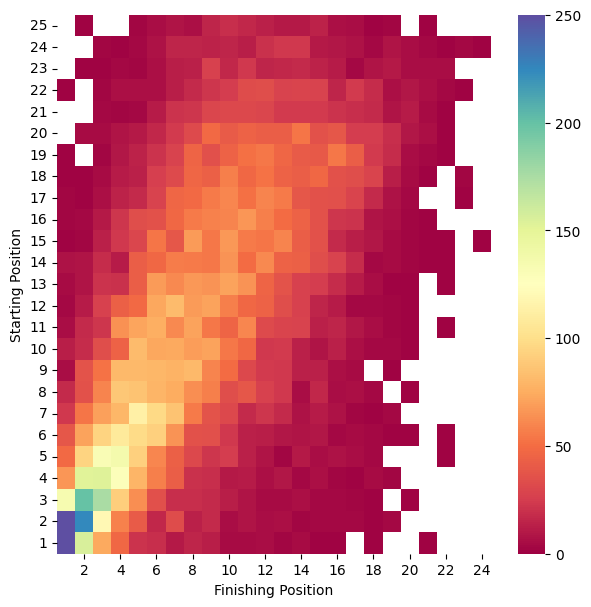

In [46]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(7,7))
sns.heatmap(data=pivoted, annot=annot,cmap=cmap,vmin = 0, vmax=250)
plt.xlabel('Finishing Position')
plt.ylabel('Starting Position')
plt.xlim([1,25])
plt.ylim([0, 25])
